In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv("Titanic Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df2 = df.drop(columns=['Name','Ticket','Cabin'])
df2 = df2.dropna(subset=['Age','Fare','Sex','Embarked'])
df2 = pd.get_dummies(df2, columns=['Sex','Embarked'], drop_first=True)

X = df2.drop('Survived', axis=1)
y = df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf = LogisticRegression(max_iter=100000)
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.8111888111888111


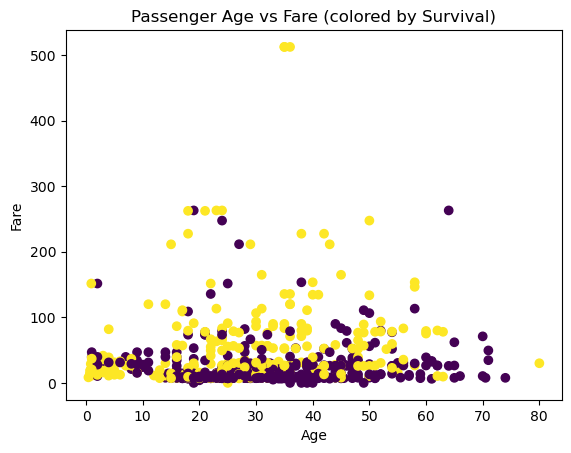

In [8]:
plt.figure()
plt.scatter(df['Age'], df['Fare'], c=df['Survived'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Passenger Age vs Fare (colored by Survival)')
plt.show()